## Regression using sequential API

In [ ]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.config.list_physical_devices('GPU')

## Boston housing regression problem

In [ ]:
boston_housing=tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = boston_housing

In [5]:
X_train_full.shape

(404, 13)

In [6]:
X_train, y_train = X_train_full[:-50], y_train_full[:-50]
X_valid, y_valid = X_train_full[-50:], y_train_full[-50:]

In [7]:
X_train.shape

(354, 13)

In [8]:
X_train.dtype

dtype('float64')

## Simple EDA with features distributions

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>,
        <AxesSubplot: title={'center': '3'}>],
       [<AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>,
        <AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>],
       [<AxesSubplot: title={'center': '8'}>,
        <AxesSubplot: title={'center': '9'}>,
        <AxesSubplot: title={'center': '10'}>,
        <AxesSubplot: title={'center': '11'}>],
       [<AxesSubplot: title={'center': '12'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

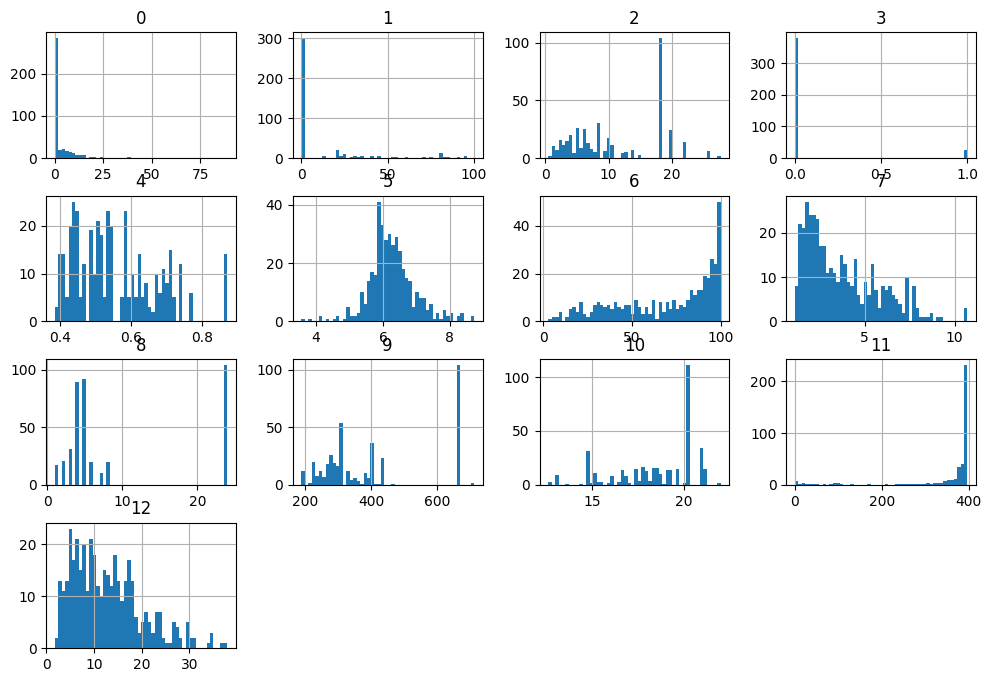

In [15]:
pd.DataFrame(X_train_full).hist(bins=50, figsize=(12, 8))

In [12]:
tf.random.set_seed(42)

## Normalizing data within the model using Normalization() layer, adapted below

In [9]:
norm_layer=K.layers.Normalization(input_shape=X_train.shape[1:])

## The model

In [ ]:
model=K.Sequential([
                    norm_layer,
                    K.layers.Dense(50, activation='relu'),
                    K.layers.Dense(50, activation='relu'),
                    K.layers.Dense(50, activation='relu'),
                    K.layers.Dense(1)
                   ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 50)                700       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,878
Trainable params: 5,851
Non-trainable params: 27
_____________________________________________________

In [12]:
model.layers

In [18]:
model.compile(loss=K.losses.mean_squared_error,
             optimizer=K.optimizers.Adam(lr=1e-3),
             metrics=["RootMeanSquaredError"])

## Normalization() layer adapation to the training dataset

In [19]:
norm_layer.adapt(X_train)

## Training

In [20]:
history = model.fit(X_train, y_train, 
         epochs=30,
         validation_data=[X_valid, y_valid])

Epoch 1/30
 1/12 [=>............................] - ETA: 13s - loss: 757.3243 - root_mean_squared_error: 27.5195

2022-11-27 10:36:40.508283: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


12/12 [==============================] - 1s 15ms/step - loss: 579.2378 - root_mean_squared_error: 24.0674 - val_loss: 525.2302 - val_root_mean_squared_error: 22.9179
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 531.9633 - root_mean_squared_error: 23.0643 - val_loss: 470.1853 - val_root_mean_squared_error: 21.6838
Epoch 3/30
12/12 [==============================] - 0s 3ms/step - loss: 464.4220 - root_mean_squared_error: 21.5505 - val_loss: 377.0003 - val_root_mean_squared_error: 19.4165
Epoch 4/30
12/12 [==============================] - 0s 3ms/step - loss: 348.5725 - root_mean_squared_error: 18.6701 - val_loss: 236.6561 - val_root_mean_squared_error: 15.3836
Epoch 5/30
12/12 [==============================] - 0s 3ms/step - loss: 191.3274 - root_mean_squared_error: 13.8321 - val_loss: 95.2090 - val_root_mean_squared_error: 9.7575
Epoch 6/30
12/12 [==============================] - 0s 3ms/step - loss: 85.6334 - root_mean_squared_error: 9.2538 - val_loss: 56.348

In [21]:
history.params['epochs']


30

In [23]:
history.history

{'loss': [579.23779296875,
  531.9632568359375,
  464.4219665527344,
  348.572509765625,
  191.3274383544922,
  85.63343811035156,
  63.37049865722656,
  46.394554138183594,
  35.72391128540039,
  29.856779098510742,
  25.335981369018555,
  22.815378189086914,
  21.111021041870117,
  19.640228271484375,
  18.66895866394043,
  17.65373992919922,
  17.92561149597168,
  16.774131774902344,
  15.836280822753906,
  15.066181182861328,
  14.604301452636719,
  14.215607643127441,
  13.706220626831055,
  13.348367691040039,
  14.48807430267334,
  13.954123497009277,
  12.590377807617188,
  12.162386894226074,
  11.959657669067383,
  11.738481521606445],
 'root_mean_squared_error': [24.067359924316406,
  23.064329147338867,
  21.550451278686523,
  18.670095443725586,
  13.83211612701416,
  9.253833770751953,
  7.960558891296387,
  6.811354637145996,
  5.976948261260986,
  5.464135646820068,
  5.0334858894348145,
  4.776544570922852,
  4.594673156738281,
  4.431729793548584,
  4.320758819580078,

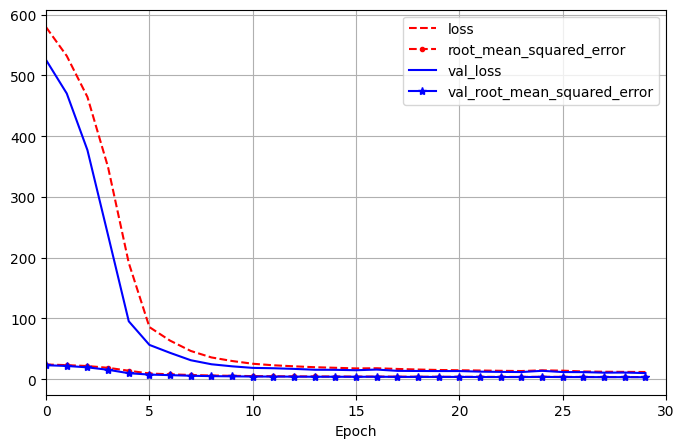

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5),
                                  xlim=[0, history.params['epochs']],
                                  #ylim=[0, 1],
                                  grid=True,
                                  xlabel='Epoch',
                                  style=["r--", "r--.", "b-", "b-*"])
plt.show()

## Model evaluation

In [25]:
mse_test, rmse_test=model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 21.7623 - root_mean_squared_error: 4.6650


In [32]:
X_new=X_test[:3]
y_new=y_test[:3]

In [33]:
y_pred=model.predict(X_new)

1/1 [==============================] - 0s 24ms/step


In [34]:
y_pred

array([[ 7.858061],
       [15.757248],
       [22.166246]], dtype=float32)

In [35]:
y_new

array([ 7.2, 18.8, 19. ])